# Iris Flower Prediction

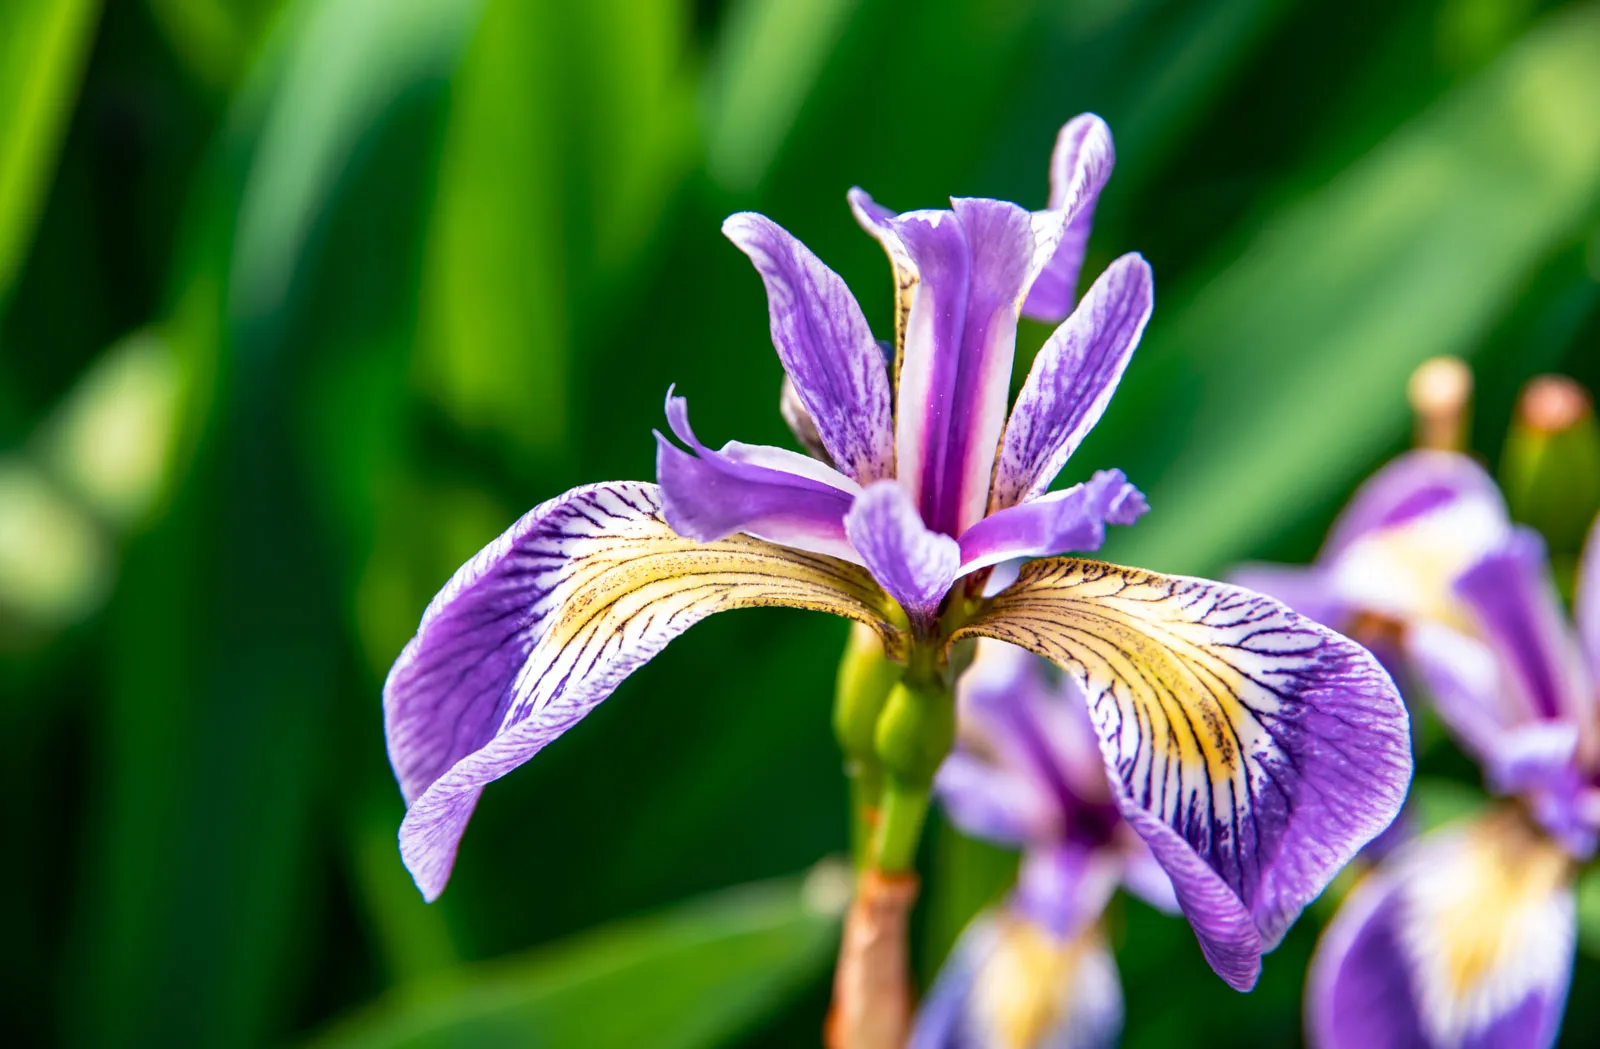

# Import necessary Libraries

In [ ]:
import pandas as pd
# import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score
# from sklearn.preprocessing import StandardScaler
# import pickle
# import joblib


# Load Dataset

In [ ]:
iris = pd.read_csv('https://raw.githubusercontent.com/lovnishverma/datasets/refs/heads/main/iriswithheaders.csv')
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [ ]:
iris.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [ ]:
iris['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

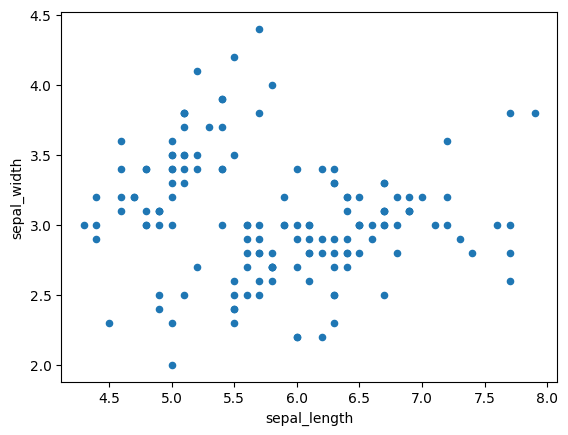

In [ ]:
iris.plot(kind='scatter', x='sepal_length', y='sepal_width')
plt.show()

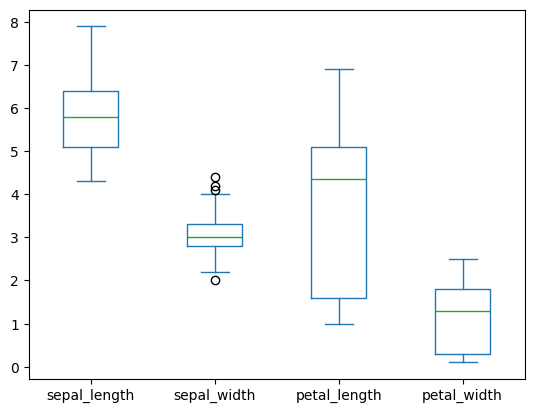

In [ ]:
iris.plot(kind='box')
plt.show()

In [ ]:
# slicing of features and target

X = iris.iloc[:,:-1] # rows, columns
y = iris.iloc[:,-1]

In [ ]:
X

sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]

In [ ]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [ ]:
# test train split
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(30, 4)
(120, 4)
(30,)
(120,)


In [ ]:
# train model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#print accuracy of model
accuracy = model.score(X_test, y_test)
print(f"{accuracy * 100} %")

100.0 %


In [ ]:
# print classification report
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

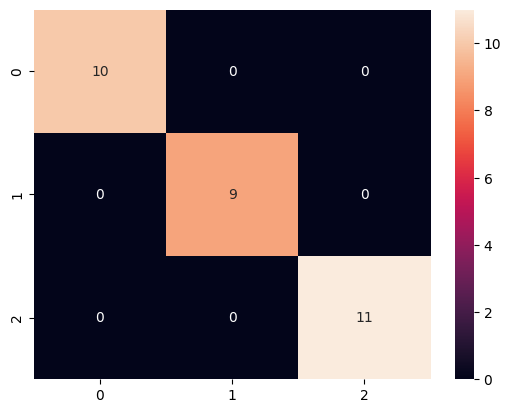

In [ ]:
# confusion matrix using seaborn
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True)
plt.show()

In [ ]:
# fit model
model = model.fit(X,y)

In [ ]:
# predict
pred = model.predict([[6.6,2.8,5.8,1.7]])
print(f"Flower can be: {pred[0]}")

Flower can be: virginica


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
# take input from user using input()
sepal_length = float(input("Enter sepal length: "))
sepal_width = float(input("Enter sepal width: "))
petal_length = float(input("Enter petal length: "))
petal_width = float(input("Enter petal width: "))

# predict
pred = model.predict([[sepal_length,sepal_width,petal_length,petal_width]])
print(f"Flower can be: {pred[0]}")

Enter sepal length: 1.4
Enter sepal width: 2.5
Enter petal length: 6.5
Enter petal width: 3.5
Flower can be: virginica


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Saving Trained Model

In [ ]:
# save model using joblib
import joblib
joblib.dump(model, 'iris_model.pkl')

['iris_model.pkl']

# Loading Saved Model and then Predicting using Saved Model

In [ ]:
# Predicting using Saved Model
model = joblib.load('iris_model.pkl')
pred = model.predict([[6.6,2.8,5.8,1.7]])
print(f"Flower can be: {pred[0]}")

Flower can be: virginica


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
